In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle_zillow

# Exploratory Analysis

##### Exercise 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [2]:
df = wrangle_zillow.get_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52319 non-null  int64  
 1   airconditioningtypeid         13615 non-null  float64
 2   architecturalstyletypeid      70 non-null     float64
 3   basementsqft                  47 non-null     float64
 4   bathroomcnt                   52319 non-null  float64
 5   bedroomcnt                    52319 non-null  float64
 6   buildingclasstypeid           0 non-null      float64
 7   buildingqualitytypeid         33654 non-null  float64
 8   calculatedbathnbr             52184 non-null  float64
 9   decktypeid                    389 non-null    float64
 10  finishedfloor1squarefeet      4371 non-null   float64
 11  calculatedfinishedsquarefeet  52238 non-null  float64
 12  finishedsquarefeet12          52073 non-null  float64
 13  f

In [3]:
df = wrangle_zillow.drop_undesired(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52075 entries, 0 to 52318
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52075 non-null  int64  
 1   bathroomcnt                   52075 non-null  float64
 2   bedroomcnt                    52075 non-null  float64
 3   calculatedbathnbr             52075 non-null  float64
 4   calculatedfinishedsquarefeet  52075 non-null  float64
 5   finishedsquarefeet12          51936 non-null  float64
 6   fips                          52075 non-null  float64
 7   fullbathcnt                   52075 non-null  float64
 8   latitude                      52075 non-null  float64
 9   longitude                     52075 non-null  float64
 10  lotsizesquarefeet             51798 non-null  float64
 11  propertycountylandusecode     52075 non-null  object 
 12  propertylandusetypeid         52075 non-null  float64
 13  r

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50559 entries, 0 to 52318
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50559 non-null  int64  
 1   bathroomcnt                   50559 non-null  float64
 2   bedroomcnt                    50559 non-null  float64
 3   calculatedbathnbr             50559 non-null  float64
 4   calculatedfinishedsquarefeet  50559 non-null  float64
 5   finishedsquarefeet12          50559 non-null  float64
 6   fips                          50559 non-null  float64
 7   fullbathcnt                   50559 non-null  float64
 8   latitude                      50559 non-null  float64
 9   longitude                     50559 non-null  float64
 10  lotsizesquarefeet             50559 non-null  float64
 11  propertycountylandusecode     50559 non-null  object 
 12  propertylandusetypeid         50559 non-null  float64
 13  r

### Questions to ask of the data:

- **Question 1** - Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- **Question 2** - Is there a relationship between logerror and taxvaluedollarcnt?

- **Question 3** - Are certain homes more likely to sell at specific times of the year? (price, sq ft of home, etc.)

- **Question 4** - Are there any natural groupings in the yearbuilt data? If so how is this related to logerror?

- **Question 5** - Which is more correlated with a higher log error: structuretaxvaluedollarcnt or landtaxvaluedollarcnt?

- **Question 6** - Is a larger lot size correlated with a larger log error?

- **Question 7** - Do overly large quantities in bathroomcnt and bedroomcnt relate to a higher log error?

##### Exercise 2. Answer those questions through a mix of statistical tests and visualizations.

I want to see the distribution of logerror first.

<AxesSubplot:xlabel='logerror', ylabel='Count'>

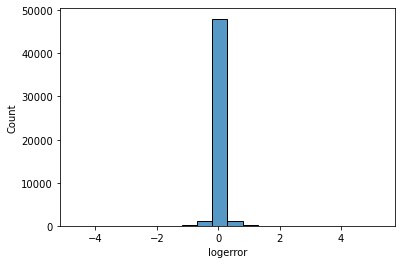

In [28]:
sns.histplot(data = df, x ='logerror', bins = 20)

Vast majority of logerror is around zero

**Question 1** - Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [5]:
def map_counties(df):
    # identified counties for fips codes 
    counties = {6037: 'los_angeles',
                6059: 'orange',
                6111: 'ventura'}
    # map counties to fips codes
    df.fips = df.fips.map(counties)
    df.rename(columns=({ 'fips': 'county'}), inplace=True)
    return df

In [6]:
df = map_counties(df)

In [7]:
df.county.value_counts()

los_angeles    32739
orange         13500
ventura         4320
Name: county, dtype: int64

<AxesSubplot:xlabel='logerror'>

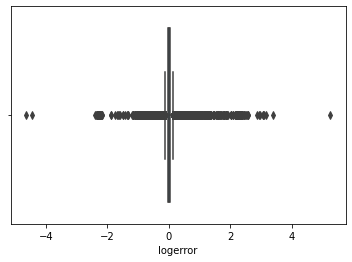

In [37]:
sns.boxplot(data =df, x = 'logerror')

<AxesSubplot:xlabel='logerror', ylabel='county'>

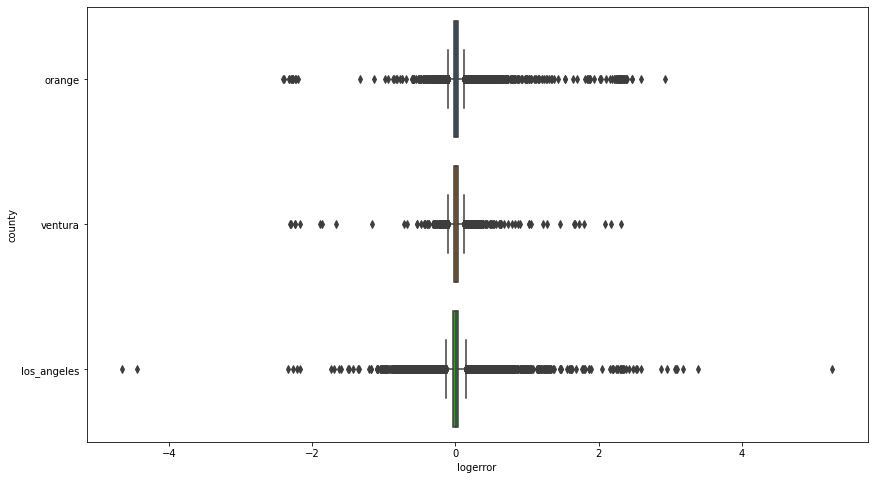

In [8]:
plt.figure(figsize=(14,8))

sns.boxplot(data= df, x = 'logerror', y = 'county' )

<AxesSubplot:xlabel='logerror'>

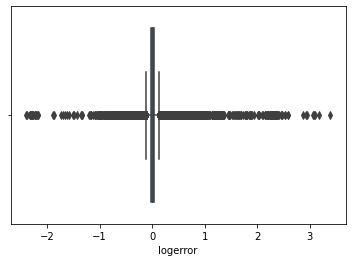

In [38]:
# Viewing without outliers below -4 and above 4 to see if it makes this more more readable
sns.boxplot(data =df[(df.logerror > -4) & (df.logerror < 4)], x = 'logerror')

<AxesSubplot:xlabel='logerror', ylabel='county'>

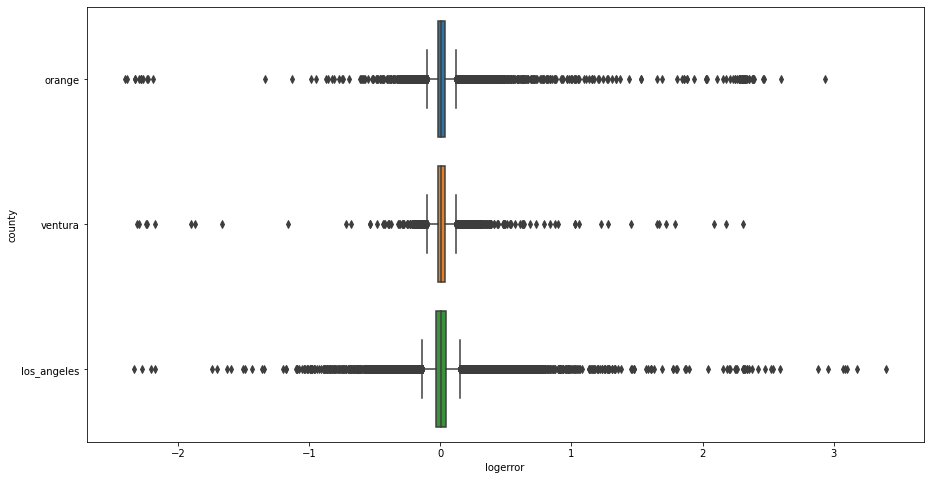

In [9]:

plt.figure(figsize=(15,8))

sns.boxplot(data= df[(df.logerror > -4) & (df.logerror < 4)], x = 'logerror', y = 'county' )

Hard to tell, will have to run t-tests.

In [39]:
# Running 1 samp ttest to see if mean of logerror for los_angeles is different than the entire population.
stats.ttest_1samp(df[df.county == 'los_angeles'].logerror, df.logerror.mean())

Ttest_1sampResult(statistic=-3.397092907394564, pvalue=0.0006818683659567509)

The mean for los_angeles is smaller than the overall population average and it is statistically significant.

In [40]:
# Running 1 samp ttest to see if mean of logerror for los_angeles is different than the entire population.
stats.ttest_1samp(df[df.county == 'orange'].logerror, df.logerror.mean())

Ttest_1sampResult(statistic=5.182441884285178, pvalue=2.221584663761513e-07)

The mean for orange is larger than the overall population average and it is statistically significant.

In [41]:
# Running 1 samp ttest to see if mean of logerror for los_angeles is different than the entire population.
stats.ttest_1samp(df[df.county == 'ventura'].logerror, df.logerror.mean())

Ttest_1sampResult(statistic=-1.2660613397931704, pvalue=0.2055594059003222)

The difference of the mean for ventura is not statistically different from the population mean.

**Question 2** - Is there a relationship between logerror and taxvaluedollarcnt?

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

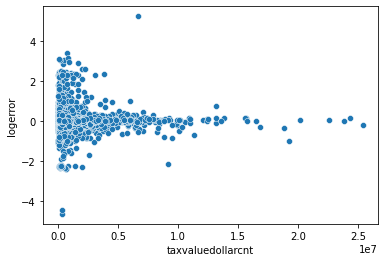

In [10]:
sns.scatterplot(data = df, x = 'taxvaluedollarcnt', y = 'logerror')

Honestly this looks like there is a correlation of 0, and taxvaluedollarcnt won't be predictive of logerror in any meaningful way.

**Question 3** - Are certain homes more likely to sell at specific times of the year? (price, size, etc.)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='transactiondate'>

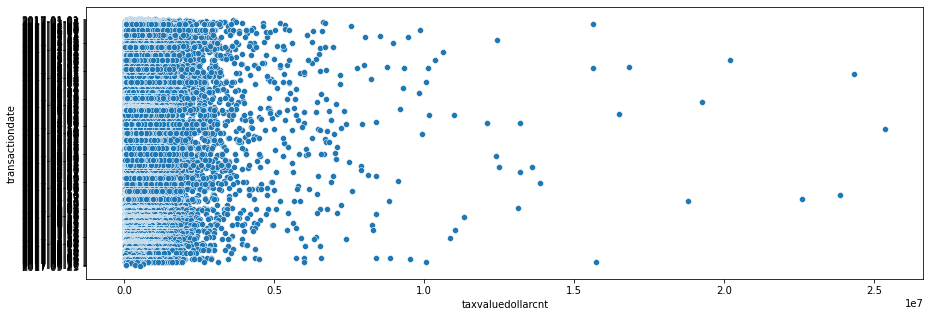

In [11]:
plt.figure(figsize=(15,5))

sns.scatterplot(data=df, x= 'taxvaluedollarcnt', y= 'transactiondate')

It doesn't appear to be correlated and seems evenly distributed throughout the year.

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='transactiondate'>

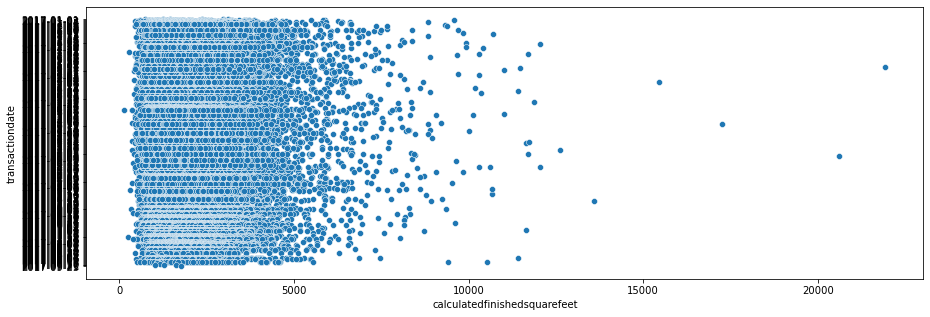

In [12]:
plt.figure(figsize=(15,5))

sns.scatterplot(data=df, x= 'calculatedfinishedsquarefeet', y= 'transactiondate')

Again evenly distributed no clear trends present

**Question 4** - Are there any natural groupings in the yearbuilt data? If so how is this related to logerror?

<AxesSubplot:xlabel='yearbuilt', ylabel='Count'>

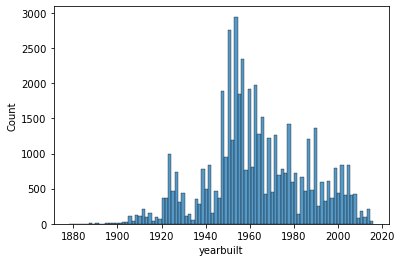

In [13]:
sns.histplot(data=df, x='yearbuilt')

There could be groupings in the data but it's hard to tell from this alone; I want to see how it correlates with logerror

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

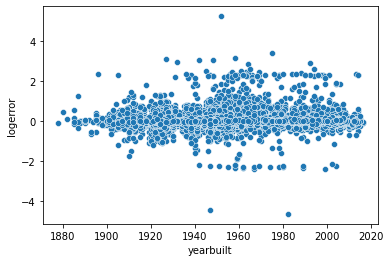

In [14]:
sns.scatterplot(data=df, x='yearbuilt', y='logerror')

Pretty flat correlation again, hard to imagine anything predictive here.

**Question 5** - Which is more correlated with a higher log error: structuretaxvaluedollarcnt or landtaxvaluedollarcnt?

<AxesSubplot:xlabel='structuretaxvaluedollarcnt', ylabel='logerror'>

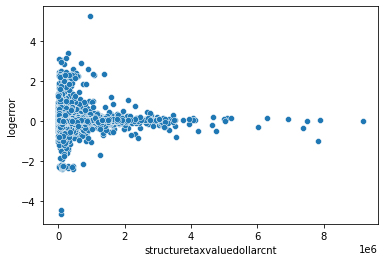

In [15]:
sns.scatterplot(data=df, x= 'structuretaxvaluedollarcnt', y='logerror')

In [18]:
corr, p = stats.pearsonr(df.structuretaxvaluedollarcnt, df.logerror)
corr, p

(0.0046540480634941215, 0.2953497226095463)

No correlation and not statistically significant.

<AxesSubplot:xlabel='landtaxvaluedollarcnt', ylabel='logerror'>

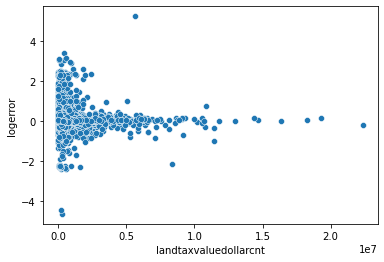

In [17]:
sns.scatterplot(data=df, x= 'landtaxvaluedollarcnt', y='logerror')

In [19]:
corr, p = stats.pearsonr(df.landtaxvaluedollarcnt, df.logerror)
corr, p

(-0.005404008268039441, 0.2243325897829453)

Again, no correlation and not statistically significant.

**Question 6** - Is a larger lot size correlated with a larger log error?

<AxesSubplot:xlabel='lotsizesquarefeet', ylabel='logerror'>

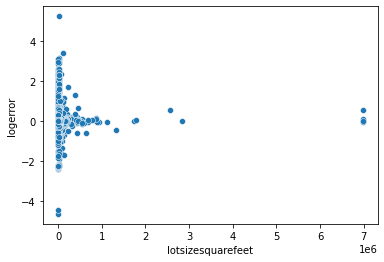

In [29]:
sns.scatterplot(data=df, x='lotsizesquarefeet', y='logerror')

**Question 7** - Do overly large quantities in bathroomcnt and bedroomcnt relate to a higher log error?

<AxesSubplot:xlabel='bathroomcnt', ylabel='Count'>

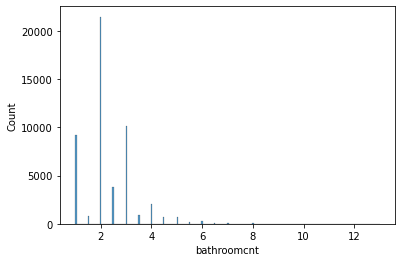

In [30]:
sns.histplot(df.bathroomcnt)

<AxesSubplot:xlabel='logerror'>

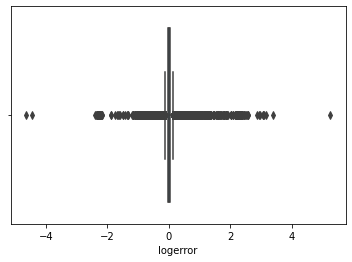

In [34]:
sns.boxplot(data = df, x = 'logerror')

<AxesSubplot:xlabel='logerror'>

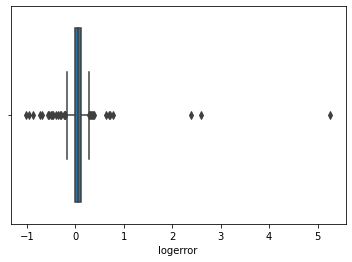

In [33]:
sns.boxplot(data = df[df.bathroomcnt > 6], x = 'logerror')

<AxesSubplot:xlabel='bedroomcnt', ylabel='Count'>

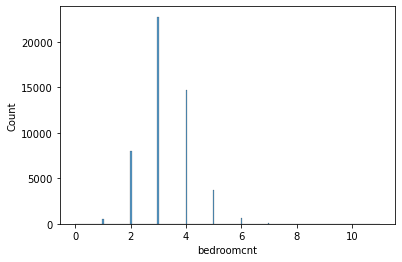

In [35]:
sns.histplot(data=df, x='bedroomcnt')

<AxesSubplot:xlabel='logerror'>

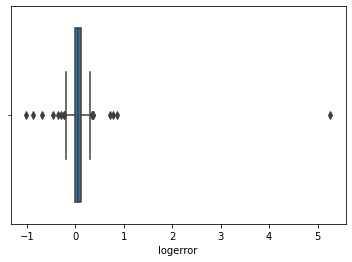

In [36]:
sns.boxplot(data = df[df.bedroomcnt > 6], x = 'logerror')

Minus a few outliers, the logerror looks the same when using high values for bedroomcnt and bathroomcnt when compared to the overall dataset.